# Restricted Boltzman Machine on MNIST

Created by: Daniel L. Marino (marinodl@vcu.edu)


In [1]:
import tensorflow as tf
import numpy as np

from twodlearn.tf_lib.DBM import *
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output
%matplotlib inline

## 1. Load MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

batch_X, batch_y = mnist.train.next_batch(100)

print(batch_X.shape)
print(np.reshape(batch_X, [-1,28,28,1]).shape)
print(batch_y.shape)
print(np.max(batch_X), np.min(batch_X))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(100, 784)
(100, 28, 28, 1)
(100, 10)
1.0 0.0


## 2. Model definition

In [3]:
sess = tf.InteractiveSession()

In [4]:
n_inputs= 28*28
n_hidden= 1000

rbm_layer = RBM(n_inputs, n_hidden)


In [5]:
batch_size= 500
x = tf.placeholder( tf.float32, shape=(batch_size, n_inputs))

cd_step, gen_model= rbm_layer.evaluate_cd_step(x, k= 10, alpha= 0.001)

## 3. Train the model

In [6]:
tf.initialize_all_variables().run()
print('Initialized')

Initialized


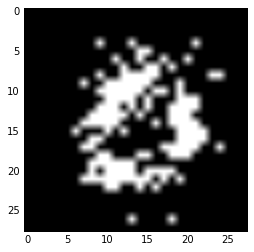

In [7]:
num_steps= 5000
n_logging = 100

for step in range(num_steps):
    # -------- train RBM -----#
    batch_x, _= mnist.train.next_batch(batch_size) 
    [_, x_g] = sess.run([cd_step, gen_model], feed_dict= {x : batch_x})
    
    #  ------- logging -------
    
    if step%n_logging == 0:
        clear_output()
               
        x_gaux = np.reshape(x_g, [-1,28,28,1])
        imgplot = plt.imshow(x_gaux[1,:,:,0], cmap='Greys_r')
        plt.show()

In [8]:
print(x_g.shape)

(500, 784)


In [9]:
x_gaux = np.reshape(x_g, [-1,28,28,1])
idx = 0

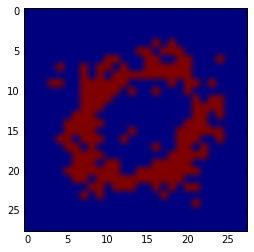

In [10]:
imgplot = plt.imshow(x_gaux[idx,:,:,0])
idx += 1

## Create random samples from the model

In [11]:
h_test = tf.placeholder( tf.float32, shape=(50, n_hidden))

gen_model2 = rbm_layer.gibbs_sampling_given_h(h_test, k=500)

In [12]:
batch_h = np.random.rand(50, n_hidden)
[x_g] = sess.run([gen_model2], feed_dict= {h_test : batch_h})
x_gaux = np.reshape(x_g, [-1,28,28,1])
idx = 0

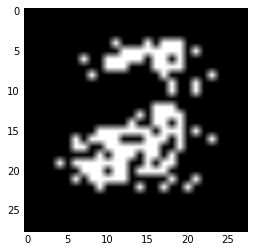

In [36]:

imgplot = plt.imshow(x_gaux[idx,:,:,0], cmap='Greys_r')
idx += 1